In [1]:
import config
import ast

import pandas as pd
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import statistics

from utils.pandas_dataframe import grid_display
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from itertools import permutations
import gc

# validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from morfist import MixedRandomForest

# grid search
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.model_selection import GridSearchCV


from sklearn.multioutput import RegressorChain
from sklearn.multioutput import MultiOutputRegressor

from IPython.display import display


%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format',lambda x: '%.2f' % x)
# pd.set_option('display.max_rows', 5)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_excel('../Data/2022-train-v2.xlsx')

In [4]:
data_y = data[['sensor_point5_i_value', 'sensor_point6_i_value',\
               'sensor_point7_i_value', 'sensor_point8_i_value',\
               'sensor_point9_i_value', 'sensor_point10_i_value']]
data_x = data.drop(['sensor_point5_i_value', 'sensor_point6_i_value',\
                    'sensor_point7_i_value', 'sensor_point8_i_value',\
                    'sensor_point9_i_value', 'sensor_point10_i_value'], axis=1)

In [5]:
data_x = data_x.fillna(0)

In [6]:
# X變數標準化
scaler = StandardScaler().fit(data_x)
data_x_S = scaler.transform(data_x)

In [7]:
config.grid_search_Cat.fit(data_x_S, data_y.loc[:,config.Y_variable])
config.grid_search_Cat.best_params_

0:	learn: 26.4704118	total: 156ms	remaining: 31s
1:	learn: 25.0334582	total: 166ms	remaining: 16.4s
2:	learn: 23.9193138	total: 175ms	remaining: 11.5s
3:	learn: 22.8499899	total: 184ms	remaining: 9.03s
4:	learn: 21.8662589	total: 193ms	remaining: 7.53s
5:	learn: 20.9489667	total: 202ms	remaining: 6.54s
6:	learn: 19.9567521	total: 212ms	remaining: 5.84s
7:	learn: 19.1213257	total: 220ms	remaining: 5.29s
8:	learn: 18.5700652	total: 229ms	remaining: 4.86s
9:	learn: 17.9634560	total: 237ms	remaining: 4.5s
10:	learn: 17.5403482	total: 245ms	remaining: 4.21s
11:	learn: 17.0765832	total: 253ms	remaining: 3.96s
12:	learn: 16.6852992	total: 260ms	remaining: 3.75s
13:	learn: 16.2692058	total: 269ms	remaining: 3.57s
14:	learn: 15.9526330	total: 277ms	remaining: 3.42s
15:	learn: 15.5906697	total: 286ms	remaining: 3.29s
16:	learn: 15.3245579	total: 294ms	remaining: 3.17s
17:	learn: 15.0659007	total: 303ms	remaining: 3.07s
18:	learn: 14.8488150	total: 312ms	remaining: 2.97s
19:	learn: 14.5885854	tot

171:	learn: 9.4105385	total: 1.65s	remaining: 269ms
172:	learn: 9.4065193	total: 1.66s	remaining: 260ms
173:	learn: 9.4000373	total: 1.68s	remaining: 250ms
174:	learn: 9.3963933	total: 1.69s	remaining: 241ms
175:	learn: 9.3926016	total: 1.69s	remaining: 231ms
176:	learn: 9.3865269	total: 1.7s	remaining: 221ms
177:	learn: 9.3744856	total: 1.71s	remaining: 212ms
178:	learn: 9.3679131	total: 1.72s	remaining: 202ms
179:	learn: 9.3582994	total: 1.73s	remaining: 193ms
180:	learn: 9.3569439	total: 1.74s	remaining: 183ms
181:	learn: 9.3538257	total: 1.75s	remaining: 174ms
182:	learn: 9.3501591	total: 1.76s	remaining: 164ms
183:	learn: 9.3467989	total: 1.77s	remaining: 154ms
184:	learn: 9.3418198	total: 1.78s	remaining: 145ms
185:	learn: 9.3337778	total: 1.79s	remaining: 135ms
186:	learn: 9.3292048	total: 1.8s	remaining: 126ms
187:	learn: 9.3209442	total: 1.81s	remaining: 116ms
188:	learn: 9.3128772	total: 1.82s	remaining: 106ms
189:	learn: 9.3042200	total: 1.84s	remaining: 96.7ms
190:	learn: 9

{'depth': 5,
 'eval_metric': 'RMSE',
 'iterations': 200,
 'l2_leaf_reg': 0.5,
 'learning_rate': 0.1,
 'random_state': 1}

In [8]:
model_select = Pipeline([('poly',PolynomialFeatures(degree = 2)),
                         ('std_scaler', StandardScaler()),
                         ('mod', config.model_info['Cat']['Model'])  # 修改model
                        ])

model_select.fit(data_x, data_y.loc[:,config.Y_variable])

y_predict = model_select.predict(data_x)
y_predict

0:	learn: 26.5265816	total: 576ms	remaining: 1m 54s
1:	learn: 25.1903589	total: 1.04s	remaining: 1m 42s
2:	learn: 23.7558563	total: 1.46s	remaining: 1m 35s
3:	learn: 22.4889978	total: 1.87s	remaining: 1m 31s
4:	learn: 21.4269363	total: 2.29s	remaining: 1m 29s
5:	learn: 20.4863604	total: 2.72s	remaining: 1m 27s
6:	learn: 19.6123388	total: 3.14s	remaining: 1m 26s
7:	learn: 18.9277173	total: 3.6s	remaining: 1m 26s
8:	learn: 18.3029514	total: 4.05s	remaining: 1m 25s
9:	learn: 17.5779628	total: 4.49s	remaining: 1m 25s
10:	learn: 16.9467225	total: 4.91s	remaining: 1m 24s
11:	learn: 16.4148383	total: 5.33s	remaining: 1m 23s
12:	learn: 15.9674023	total: 5.74s	remaining: 1m 22s
13:	learn: 15.5632207	total: 6.16s	remaining: 1m 21s
14:	learn: 15.1764653	total: 6.59s	remaining: 1m 21s
15:	learn: 14.9041458	total: 7.02s	remaining: 1m 20s
16:	learn: 14.7033162	total: 7.45s	remaining: 1m 20s
17:	learn: 14.4001101	total: 7.9s	remaining: 1m 19s
18:	learn: 14.1110337	total: 8.34s	remaining: 1m 19s
19:	l

159:	learn: 9.2670404	total: 1m 10s	remaining: 17.6s
160:	learn: 9.2627061	total: 1m 10s	remaining: 17.1s
161:	learn: 9.2588047	total: 1m 11s	remaining: 16.7s
162:	learn: 9.2525779	total: 1m 11s	remaining: 16.3s
163:	learn: 9.2475079	total: 1m 12s	remaining: 15.8s
164:	learn: 9.2429840	total: 1m 12s	remaining: 15.4s
165:	learn: 9.2336063	total: 1m 13s	remaining: 15s
166:	learn: 9.2284227	total: 1m 13s	remaining: 14.5s
167:	learn: 9.2245389	total: 1m 13s	remaining: 14.1s
168:	learn: 9.2171982	total: 1m 14s	remaining: 13.6s
169:	learn: 9.2124663	total: 1m 14s	remaining: 13.2s
170:	learn: 9.2044860	total: 1m 15s	remaining: 12.8s
171:	learn: 9.2004817	total: 1m 15s	remaining: 12.3s
172:	learn: 9.1955571	total: 1m 16s	remaining: 11.9s
173:	learn: 9.1924739	total: 1m 16s	remaining: 11.4s
174:	learn: 9.1892980	total: 1m 17s	remaining: 11s
175:	learn: 9.1866654	total: 1m 17s	remaining: 10.6s
176:	learn: 9.1810302	total: 1m 17s	remaining: 10.1s
177:	learn: 9.1750599	total: 1m 18s	remaining: 9.6

array([ 58.75345405,  62.32400594,  62.32400594,  62.32400594,
        68.81326929,  68.81326929,  68.81326929,  68.81326929,
        69.39538873,  69.39538873,  66.69205204,  66.69205204,
        66.69205204,  66.69205204,  70.79225649,  70.79225649,
        78.25400696,  78.25400696,  77.05133698,  77.64358243,
        77.64358243,  77.76111326,  77.0908873 ,  77.0908873 ,
        77.0908873 ,  74.01928704,  76.03651752,  57.65742946,
        57.65742946,  56.47512576,  56.47512576,  56.47512576,
        56.47512576,  55.96509714,  54.85747343,  54.85747343,
        54.85747343,  54.85747343,  54.85747343,  54.85747343,
        54.85747343,  54.85747343,  60.49450821,  60.49450821,
        60.49450821,  52.30477676,  52.30477676,  52.30477676,
        58.38337703,  51.83973471,  52.54661937,  52.54661937,
        50.20351382,  50.94743465,  50.94743465,  54.90888601,
        54.90888601,  54.90888601,  55.49713203,  55.49713203,
        67.73461749,  67.73461749,  76.1030867 ,  76.16

In [9]:
k_fold_RMSE = -cross_val_score(model_select, 
                               data_x,
                               data_y.loc[:,config.Y_variable], 
                               cv = 5, 
                               scoring = 'neg_root_mean_squared_error').mean()

print('RMSE:' + str(round(k_fold_RMSE,2)))

0:	learn: 26.2092818	total: 508ms	remaining: 1m 41s
1:	learn: 24.8290045	total: 880ms	remaining: 1m 27s
2:	learn: 23.6027048	total: 1.26s	remaining: 1m 23s
3:	learn: 22.4603831	total: 1.63s	remaining: 1m 19s
4:	learn: 21.3418359	total: 2.01s	remaining: 1m 18s
5:	learn: 20.3386356	total: 2.39s	remaining: 1m 17s
6:	learn: 19.5680124	total: 2.81s	remaining: 1m 17s
7:	learn: 18.9473977	total: 3.23s	remaining: 1m 17s
8:	learn: 18.2662092	total: 3.6s	remaining: 1m 16s
9:	learn: 17.7092342	total: 4s	remaining: 1m 16s
10:	learn: 17.3321584	total: 4.39s	remaining: 1m 15s
11:	learn: 16.9939542	total: 4.79s	remaining: 1m 15s
12:	learn: 16.6340114	total: 5.18s	remaining: 1m 14s
13:	learn: 16.2477667	total: 5.62s	remaining: 1m 14s
14:	learn: 15.8499376	total: 6.01s	remaining: 1m 14s
15:	learn: 15.5532352	total: 6.4s	remaining: 1m 13s
16:	learn: 15.3389278	total: 6.83s	remaining: 1m 13s
17:	learn: 15.1400263	total: 7.23s	remaining: 1m 13s
18:	learn: 14.9910500	total: 7.64s	remaining: 1m 12s
19:	lear

158:	learn: 9.7585675	total: 1m 2s	remaining: 16s
159:	learn: 9.7497464	total: 1m 2s	remaining: 15.6s
160:	learn: 9.7445978	total: 1m 2s	remaining: 15.3s
161:	learn: 9.7389746	total: 1m 3s	remaining: 14.9s
162:	learn: 9.7333237	total: 1m 3s	remaining: 14.5s
163:	learn: 9.7291574	total: 1m 4s	remaining: 14.1s
164:	learn: 9.7244608	total: 1m 4s	remaining: 13.7s
165:	learn: 9.7183081	total: 1m 4s	remaining: 13.3s
166:	learn: 9.7149492	total: 1m 5s	remaining: 12.9s
167:	learn: 9.7120942	total: 1m 5s	remaining: 12.5s
168:	learn: 9.7046574	total: 1m 6s	remaining: 12.1s
169:	learn: 9.7000089	total: 1m 6s	remaining: 11.7s
170:	learn: 9.6954729	total: 1m 6s	remaining: 11.4s
171:	learn: 9.6925617	total: 1m 7s	remaining: 10.9s
172:	learn: 9.6895644	total: 1m 7s	remaining: 10.5s
173:	learn: 9.6851020	total: 1m 7s	remaining: 10.1s
174:	learn: 9.6817950	total: 1m 8s	remaining: 9.75s
175:	learn: 9.6790458	total: 1m 8s	remaining: 9.36s
176:	learn: 9.6757572	total: 1m 9s	remaining: 8.97s
177:	learn: 9.

117:	learn: 9.5520086	total: 46.3s	remaining: 32.2s
118:	learn: 9.5446630	total: 46.7s	remaining: 31.8s
119:	learn: 9.5325831	total: 47.1s	remaining: 31.4s
120:	learn: 9.5259539	total: 47.5s	remaining: 31s
121:	learn: 9.5147957	total: 47.9s	remaining: 30.6s
122:	learn: 9.4987183	total: 48.3s	remaining: 30.2s
123:	learn: 9.4932741	total: 48.7s	remaining: 29.8s
124:	learn: 9.4774895	total: 49.1s	remaining: 29.5s
125:	learn: 9.4669280	total: 49.5s	remaining: 29.1s
126:	learn: 9.4621704	total: 49.9s	remaining: 28.7s
127:	learn: 9.4544736	total: 50.3s	remaining: 28.3s
128:	learn: 9.4497882	total: 50.8s	remaining: 27.9s
129:	learn: 9.4339270	total: 51.2s	remaining: 27.6s
130:	learn: 9.4272060	total: 51.6s	remaining: 27.2s
131:	learn: 9.4147315	total: 52s	remaining: 26.8s
132:	learn: 9.4072564	total: 52.4s	remaining: 26.4s
133:	learn: 9.3983856	total: 52.7s	remaining: 26s
134:	learn: 9.3886172	total: 53.1s	remaining: 25.5s
135:	learn: 9.3839416	total: 53.4s	remaining: 25.1s
136:	learn: 9.3784

75:	learn: 10.5613004	total: 30.9s	remaining: 50.4s
76:	learn: 10.5322063	total: 31.3s	remaining: 49.9s
77:	learn: 10.5144050	total: 31.7s	remaining: 49.5s
78:	learn: 10.4982583	total: 32.1s	remaining: 49.1s
79:	learn: 10.4754772	total: 32.5s	remaining: 48.7s
80:	learn: 10.4584999	total: 32.9s	remaining: 48.3s
81:	learn: 10.4076124	total: 33.4s	remaining: 48.1s
82:	learn: 10.3900791	total: 33.9s	remaining: 47.7s
83:	learn: 10.3632530	total: 34.3s	remaining: 47.4s
84:	learn: 10.3393896	total: 34.7s	remaining: 47s
85:	learn: 10.3222273	total: 35.1s	remaining: 46.6s
86:	learn: 10.2943947	total: 35.6s	remaining: 46.2s
87:	learn: 10.2708232	total: 35.9s	remaining: 45.7s
88:	learn: 10.2501768	total: 36.3s	remaining: 45.2s
89:	learn: 10.2257230	total: 36.7s	remaining: 44.8s
90:	learn: 10.2080840	total: 37.1s	remaining: 44.4s
91:	learn: 10.1821003	total: 37.5s	remaining: 44s
92:	learn: 10.1530199	total: 37.9s	remaining: 43.6s
93:	learn: 10.1282752	total: 38.2s	remaining: 43.1s
94:	learn: 10.11

34:	learn: 10.9724121	total: 12.9s	remaining: 1m
35:	learn: 10.9352305	total: 13.3s	remaining: 1m
36:	learn: 10.9009908	total: 13.6s	remaining: 59.9s
37:	learn: 10.8239520	total: 13.9s	remaining: 59.3s
38:	learn: 10.7285094	total: 14.2s	remaining: 58.8s
39:	learn: 10.6958797	total: 14.6s	remaining: 58.3s
40:	learn: 10.6375047	total: 14.9s	remaining: 57.9s
41:	learn: 10.5920311	total: 15.3s	remaining: 57.5s
42:	learn: 10.5309240	total: 15.7s	remaining: 57.2s
43:	learn: 10.4934670	total: 16s	remaining: 56.8s
44:	learn: 10.4509510	total: 16.4s	remaining: 56.4s
45:	learn: 10.4290658	total: 16.7s	remaining: 55.9s
46:	learn: 10.3963788	total: 17.1s	remaining: 55.6s
47:	learn: 10.3710172	total: 17.4s	remaining: 55.2s
48:	learn: 10.3151530	total: 17.7s	remaining: 54.7s
49:	learn: 10.2797061	total: 18.1s	remaining: 54.3s
50:	learn: 10.2498815	total: 18.4s	remaining: 53.9s
51:	learn: 10.2231841	total: 18.8s	remaining: 53.6s
52:	learn: 10.2077012	total: 19.2s	remaining: 53.2s
53:	learn: 10.179289

194:	learn: 8.4812437	total: 1m 8s	remaining: 1.76s
195:	learn: 8.4778393	total: 1m 9s	remaining: 1.41s
196:	learn: 8.4765273	total: 1m 9s	remaining: 1.06s
197:	learn: 8.4751190	total: 1m 9s	remaining: 705ms
198:	learn: 8.4714669	total: 1m 10s	remaining: 352ms
199:	learn: 8.4699639	total: 1m 10s	remaining: 0us
0:	learn: 25.7105603	total: 521ms	remaining: 1m 43s
1:	learn: 24.0528652	total: 920ms	remaining: 1m 31s
2:	learn: 22.7324426	total: 1.35s	remaining: 1m 29s
3:	learn: 21.5426699	total: 1.78s	remaining: 1m 27s
4:	learn: 20.3908045	total: 2.17s	remaining: 1m 24s
5:	learn: 19.4386847	total: 2.5s	remaining: 1m 20s
6:	learn: 18.5972390	total: 2.82s	remaining: 1m 17s
7:	learn: 17.8339360	total: 3.15s	remaining: 1m 15s
8:	learn: 17.2767235	total: 3.5s	remaining: 1m 14s
9:	learn: 16.6104603	total: 3.86s	remaining: 1m 13s
10:	learn: 16.0185141	total: 4.24s	remaining: 1m 12s
11:	learn: 15.5005495	total: 4.61s	remaining: 1m 12s
12:	learn: 15.0583745	total: 4.99s	remaining: 1m 11s
13:	learn: 

154:	learn: 8.5970780	total: 1m	remaining: 17.7s
155:	learn: 8.5829698	total: 1m 1s	remaining: 17.3s
156:	learn: 8.5782352	total: 1m 1s	remaining: 16.9s
157:	learn: 8.5736854	total: 1m 2s	remaining: 16.5s
158:	learn: 8.5685419	total: 1m 2s	remaining: 16.1s
159:	learn: 8.5634035	total: 1m 2s	remaining: 15.7s
160:	learn: 8.5591825	total: 1m 3s	remaining: 15.3s
161:	learn: 8.5500152	total: 1m 3s	remaining: 14.9s
162:	learn: 8.5425514	total: 1m 3s	remaining: 14.5s
163:	learn: 8.5360435	total: 1m 4s	remaining: 14.1s
164:	learn: 8.5304555	total: 1m 4s	remaining: 13.7s
165:	learn: 8.5241812	total: 1m 4s	remaining: 13.3s
166:	learn: 8.5208423	total: 1m 5s	remaining: 12.9s
167:	learn: 8.5096030	total: 1m 5s	remaining: 12.5s
168:	learn: 8.5059404	total: 1m 5s	remaining: 12.1s
169:	learn: 8.5008623	total: 1m 6s	remaining: 11.7s
170:	learn: 8.4939925	total: 1m 6s	remaining: 11.3s
171:	learn: 8.4868330	total: 1m 7s	remaining: 10.9s
172:	learn: 8.4833426	total: 1m 7s	remaining: 10.5s
173:	learn: 8.4

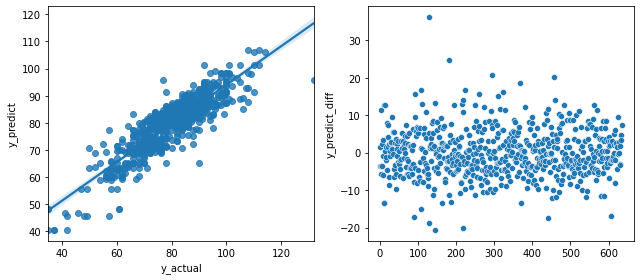

In [10]:
y_predict_diff = data_y.loc[:,config.Y_variable] - y_predict

model_result = pd.DataFrame({'y_predict_diff':y_predict_diff,
                             'y_actual':data_y.loc[:,config.Y_variable],
                             'y_predict':y_predict})
# display(Y_predict_diff)

# seaborn呈現結果
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# 預測值跟實際值分布狀況
sns.regplot(x = 'y_actual', 
            y = 'y_predict',
            data = model_result, 
            ax=axes[0])
    
    # 每筆資料的差異
sns.scatterplot(x = model_result.index,
                y = 'y_predict_diff',
                data = model_result, 
                ax=axes[1])
    
    
plt.tight_layout()